# Task
Develop a machine learning solution to detect phishing content using natural language processing techniques, including data acquisition, text preprocessing, TF-IDF vectorization, training and evaluating classification models (Logistic Regression, Naïve Bayes, Random Forest), and extracting cybersecurity insights from the best-performing model.

## Project Overview and Setup

### Subtask:
Understand the project goal, identify necessary libraries, and set up the development environment.


**Reasoning**:
Based on the instructions, I need to identify and install the necessary Python libraries for data handling, NLP, machine learning, and visualization. This involves using `pip install` for `pandas`, `numpy`, `nltk`, `scikit-learn`, `matplotlib`, and `seaborn`.



In [2]:
get_ipython().system('pip install pandas numpy nltk scikit-learn matplotlib seaborn')
print("Libraries installed successfully.")

Libraries installed successfully.


**Reasoning**:
With the libraries successfully installed, the next logical step is to import them to verify they are accessible and ready for use in the development environment. This completes the setup portion of the subtask.



In [3]:
import pandas as pd
import numpy as np
import nltk
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully, environment setup complete.")

Libraries imported successfully, environment setup complete.


## Dataset Acquisition and Initial Exploration

### Subtask:
Acquire a suitable phishing dataset, load it, and perform initial data exploration to understand its structure and content.


In [34]:
import kagglehub
import os

# Download the specified Kaggle dataset
# The path returned by kagglehub.dataset_download is typically a directory.
print("Downloading Kaggle dataset 'naserabdullahalam/phishing-email-dataset'...")
path = kagglehub.dataset_download("naserabdullahalam/phishing-email-dataset")

# Find the CSV file within the downloaded directory
# Assuming the CSV is directly in the downloaded path or a subdirectory.
# We will need to inspect the 'path' to find the actual CSV file name.

# For example, if the path is '/kaggle/input/phishing-email-dataset' and the file is 'Phishing_Email.csv'
# We'll need to locate the actual CSV file name within the downloaded directory.

# Let's try to list the contents of the downloaded path to identify the CSV file.
print(f"Dataset downloaded to: {path}")

dataset_files = os.listdir(path)
csv_files = [f for f in dataset_files if f.endswith('.csv')]

if csv_files:
    actual_file_name = os.path.join(path, csv_files[0])
    print(f"Identified CSV file: {actual_file_name}")
    # Store this for later use
    global kaggle_phishing_dataset_path
    kaggle_phishing_dataset_path = actual_file_name
else:
    print("No CSV files found in the downloaded Kaggle dataset.")
    kaggle_phishing_dataset_path = None

print("Kaggle dataset acquisition complete.")


100%|██████████| 77.1M/77.1M [00:00<00:00, 170MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/naserabdullahalam/phishing-email-dataset/versions/1
Identified CSV file: /root/.cache/kagglehub/datasets/naserabdullahalam/phishing-email-dataset/versions/1/Enron.csv
Kaggle dataset acquisition complete.
Removed old 'SMSSpamCollection'.


## Load and Initial Inspection of New Kaggle Dataset

### Subtask:
Load the newly downloaded Kaggle dataset into a pandas DataFrame. Display the first few rows (`.head()`), its information (`.info()`), and descriptive statistics (`.describe()`) to understand its structure, columns, and data types. This replaces the previous dataset loading steps.

In [35]:
import pandas as pd

if 'kaggle_phishing_dataset_path' in globals() and kaggle_phishing_dataset_path:
    # Load the new Kaggle dataset into a DataFrame
    # Based on the typical structure of 'Phishing Email Detection Dataset', it's usually a CSV.
    df = pd.read_csv(kaggle_phishing_dataset_path)

    print("New Kaggle dataset loaded successfully.")
    print("First 5 rows of the new dataset:")
    display(df.head())

    print("\nNew Dataset Information:")
    df.info()

    print("\nDescriptive statistics for the new dataset:")
    display(df.describe(include='all'))
else:
    print("Kaggle dataset path not found. Please ensure the download was successful.")
    print("Skipping dataset loading and initial inspection.")

New Kaggle dataset loaded successfully.
First 5 rows of the new dataset:


,subject,body,label
0,"hpl nom for may 25 , 2001",( see attached file : hplno 525 . xls )\r\n- h...,0
1,re : nom / actual vols for 24 th,- - - - - - - - - - - - - - - - - - - - - - fo...,0
2,"enron actuals for march 30 - april 1 , 201","estimated actuals\r\nmarch 30 , 2001\r\nno flo...",0
3,"hpl nom for may 30 , 2001",( see attached file : hplno 530 . xls )\r\n- h...,0
4,"hpl nom for june 1 , 2001",( see attached file : hplno 601 . xls )\r\n- h...,0



New Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29767 entries, 0 to 29766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  29569 non-null  object
 1   body     29767 non-null  object
 2   label    29767 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 697.8+ KB

Descriptive statistics for the new dataset:


,subject,body,label
count,29569,29767,29767.000000
unique,23570,29767,NaN
top,schedule crawler : hourahead failure,"hello , welcome to the medzonlin claiming e\r\...",NaN
freq,185,1,NaN
mean,NaN,NaN,0.469513
std,NaN,NaN,0.499078
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,1.000000


## Verify Dataset Columns and Balance for Kaggle Dataset

### Subtask:
Confirm that the Kaggle dataset contains columns for message content and labels. Analyze the distribution of the target variable (`label`) using `value_counts()` and visualize it. Adapt column names if necessary to 'message' and 'label', assuming the relevant columns are 'Email Text' and 'Email Type' or similar based on Kaggle dataset commonalities.

# Task
Develop a machine learning solution to detect phishing content using natural language processing techniques, including data acquisition, text preprocessing, TF-IDF vectorization, training and evaluating classification models (Logistic Regression, Naïve Bayes, Random Forest), and extracting cybersecurity insights from the best-performing model.

## Text Preprocessing

### Subtask:
Apply NLP techniques such as tokenization, stop-word removal, and lemmatization to clean and prepare the text data for feature extraction. Ensure NLTK data (punkt, stopwords, wordnet) is downloaded.


**Reasoning**:
The first instruction is to rename the 'body' column to 'message' in the DataFrame `df`. This is a crucial step to standardize the column names before further processing.



In [39]:
df.rename(columns={'body': 'message'}, inplace=True)
print("Column 'body' renamed to 'message'.")

Column 'body' renamed to 'message'.


**Reasoning**:
The next step is to check for and handle any missing values in the newly renamed 'message' column by filling them with an empty string, ensuring data consistency for NLP processing.



In [40]:
print(f"Missing values in 'message' column before handling: {df['message'].isnull().sum()}")
df['message'].fillna('', inplace=True)
print(f"Missing values in 'message' column after handling: {df['message'].isnull().sum()}")

Missing values in 'message' column before handling: 0
Missing values in 'message' column after handling: 0


/tmp/ipython-input-2571574877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['message'].fillna('', inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` regarding `inplace=True` with chained assignment. To address this and follow best practices, I will modify the `fillna` operation to directly assign the result back to the column. After that, I will display the value counts for the 'label' column as per the instructions to understand its distribution.



In [41]:
print(f"Missing values in 'message' column before handling: {df['message'].isnull().sum()}")
df['message'] = df['message'].fillna('')
print(f"Missing values in 'message' column after handling: {df['message'].isnull().sum()}")

print("\nValue counts for the 'label' column:")
display(df['label'].value_counts())

Missing values in 'message' column before handling: 0
Missing values in 'message' column after handling: 0

Value counts for the 'label' column:


,count
label,
0,15791
1,13976


**Reasoning**:
The next step is to visualize the distribution of the target variable. I will create a count plot using `seaborn.countplot` and `matplotlib.pyplot` to graphically represent the value counts of the 'label' column, which is essential for understanding the dataset's balance.



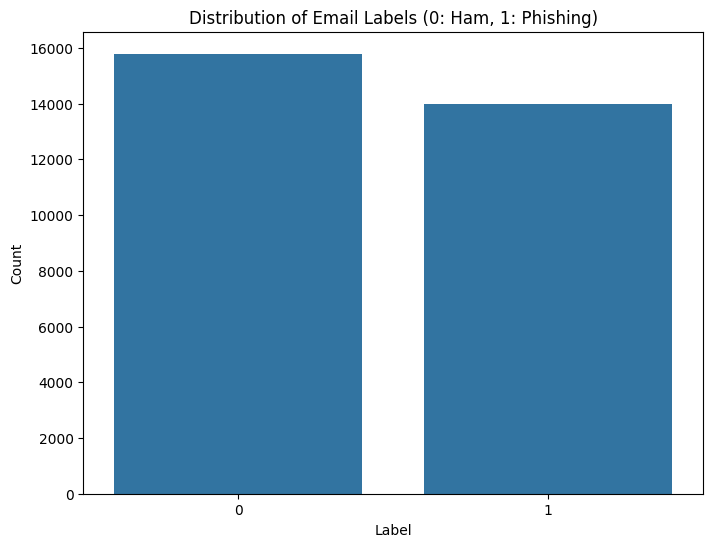

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Email Labels (0: Ham, 1: Phishing)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


**Reasoning**:
The next step is to download the necessary NLTK data packages ('punkt', 'stopwords', and 'wordnet') to enable tokenization, stop-word removal, and lemmatization, which are crucial for text preprocessing.



In [43]:
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet'])
print("NLTK data (punkt, stopwords, wordnet) downloaded successfully.")

NLTK data (punkt, stopwords, wordnet) downloaded successfully.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Reasoning**:
With the NLTK data successfully downloaded, the next logical step is to import the necessary NLP tools (tokenizer, stopwords, lemmatizer) and define the text preprocessing function as outlined in the instructions. This function will convert text to lowercase, tokenize, remove punctuation/non-alphabetic characters and stopwords, and then lemmatize the tokens.



In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the processed tokens back into a single string
    return ' '.join(tokens)

print("NLTK modules imported, lemmatizer initialized, and preprocessing function defined.")

NLTK modules imported, lemmatizer initialized, and preprocessing function defined.


**Reasoning**:
Now that the preprocessing function is defined, I will apply it to the 'message' column of the DataFrame `df` and store the output in a new column named 'processed_message'. This completes the text preprocessing step for the dataset.



In [45]:
print("Applying preprocessing to 'message' column...")
df['processed_message'] = df['message'].apply(preprocess_text)
print("Preprocessing complete. First 5 processed messages:")
display(df[['message', 'processed_message']].head())

Applying preprocessing to 'message' column...
Preprocessing complete. First 5 processed messages:


,message,processed_message
0,( see attached file : hplno 525 . xls )\r\n- h...,see attached file hplno xl hplno xl
1,- - - - - - - - - - - - - - - - - - - - - - fo...,forwarded sabrae zajac hou ect pm enron capita...
2,"estimated actuals\r\nmarch 30 , 2001\r\nno flo...",estimated actuals march flow march flow april ...
3,( see attached file : hplno 530 . xls )\r\n- h...,see attached file hplno xl hplno xl
4,( see attached file : hplno 601 . xls )\r\n- h...,see attached file hplno xl hplno xl


## Feature Engineering (TF-IDF Vectorization)

### Subtask:
Convert the preprocessed text into numerical features using TF-IDF vectorization. Identify high-frequency phishing words and phrases from the vectorized data.


**Reasoning**:
The first instruction is to import `TfidfVectorizer` from `sklearn.feature_extraction.text`, which is essential for converting text data into numerical TF-IDF features as required by the subtask.



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("TfidfVectorizer imported successfully.")

TfidfVectorizer imported successfully.


**Reasoning**:
Now that `TfidfVectorizer` is imported, the next step is to instantiate it and apply it to the `processed_message` column of the DataFrame `df` using `fit_transform()` to create the TF-IDF matrix.



In [47]:
vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for practicality
tfidf_matrix = vectorizer.fit_transform(df['processed_message'])

print("TF-IDF vectorizer instantiated and applied. TF-IDF matrix created.")

TF-IDF vectorizer instantiated and applied. TF-IDF matrix created.


**Reasoning**:
Now that the TF-IDF matrix has been created, I will get the feature names, calculate the sum of TF-IDF scores for each feature, create a DataFrame from these, sort it, and display the top 20 words to identify high-frequency and important terms as per the instructions.



In [49]:
feature_names = vectorizer.get_feature_names_out()
tfidf_sums = tfidf_matrix.sum(axis=0).A1

tfidf_scores_df = pd.DataFrame({
    'feature': feature_names,
    'tfidf_sum': tfidf_sums
})

top_words = tfidf_scores_df.sort_values(by='tfidf_sum', ascending=False).head(20)

print("Top 20 high-frequency words based on TF-IDF scores:")
display(top_words)

Top 20 high-frequency words based on TF-IDF scores:


,feature,tfidf_sum
1511,enron,964.491743
1426,ect,928.136220
857,com,777.555871
3361,please,681.930104
2150,http,576.373584
2129,hou,464.771520
1922,get,436.838154
2823,message,436.551002
4949,would,434.430292
4782,vince,431.240484


## Machine Learning Model Training

### Subtask:
Train different classification models (Logistic Regression, Naïve Bayes, Random Forest) on the vectorized text data to classify phishing vs. legitimate messages. This includes splitting the data into training and testing sets.


**Reasoning**:
The first step in the current subtask is to import the necessary modules for splitting the data and for the classification models.



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

print("Required modules imported successfully.")

Required modules imported successfully.


**Reasoning**:
With the necessary modules imported, the next logical step is to define the feature matrix and target variable, split the data into training and testing sets, and then initialize and train the Logistic Regression, Multinomial Naïve Bayes, and Random Forest models as per the subtask instructions.



In [51]:
X = tfidf_matrix
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

# 4. Initialize and train a LogisticRegression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
print("Logistic Regression model trained.")

# 5. Initialize and train a MultinomialNB model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
print("Multinomial Naïve Bayes model trained.")

# 6. Initialize and train a RandomForestClassifier model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

Data split into training and testing sets.
Logistic Regression model trained.
Multinomial Naïve Bayes model trained.
Random Forest Classifier model trained.


## Model Evaluation

### Subtask:
Evaluate the performance of the trained models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix on the test set.


**Reasoning**:
The first step in evaluating the models is to make predictions on the test set for each of the trained models and import the necessary evaluation metrics from `sklearn.metrics`.



In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the test set for each model
y_pred_lr = model_lr.predict(X_test)
y_pred_nb = model_nb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print("Predictions made for all models and evaluation metrics imported.")

Predictions made for all models and evaluation metrics imported.


**Reasoning**:
Now that predictions are made, the next step is to evaluate the Logistic Regression model by calculating and printing its accuracy, classification report, and confusion matrix using the `y_test` and `y_pred_lr` values.



In [53]:
print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_lr), index=['Actual Ham', 'Actual Phishing'], columns=['Predicted Ham', 'Predicted Phishing']))


--- Logistic Regression Model Evaluation ---
Accuracy: 0.9837
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3185
           1       0.97      0.99      0.98      2769

    accuracy                           0.98      5954
   macro avg       0.98      0.98      0.98      5954
weighted avg       0.98      0.98      0.98      5954

Confusion Matrix:


,Predicted Ham,Predicted Phishing
Actual Ham,3105,80
Actual Phishing,17,2752


**Reasoning**:
Following the evaluation of the Logistic Regression model, the next step is to evaluate the Multinomial Naïve Bayes model by calculating and printing its accuracy, classification report, and confusion matrix using the `y_test` and `y_pred_nb` values.



In [55]:
print("\n--- Multinomial Naïve Bayes Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_nb), index=['Actual Ham', 'Actual Phishing'], columns=['Predicted Ham', 'Predicted Phishing']))


--- Multinomial Naïve Bayes Model Evaluation ---
Accuracy: 0.9730
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3185
           1       0.97      0.97      0.97      2769

    accuracy                           0.97      5954
   macro avg       0.97      0.97      0.97      5954
weighted avg       0.97      0.97      0.97      5954

Confusion Matrix:


,Predicted Ham,Predicted Phishing
Actual Ham,3112,73
Actual Phishing,88,2681


**Reasoning**:
Following the evaluation of the Multinomial Naïve Bayes model, the next step is to evaluate the Random Forest Classifier model by calculating and printing its accuracy, classification report, and confusion matrix using the `y_test` and `y_pred_rf` values.



In [56]:
print("\n--- Random Forest Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_rf), index=['Actual Ham', 'Actual Phishing'], columns=['Predicted Ham', 'Predicted Phishing']))


--- Random Forest Classifier Model Evaluation ---
Accuracy: 0.9798
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3185
           1       0.97      0.98      0.98      2769

    accuracy                           0.98      5954
   macro avg       0.98      0.98      0.98      5954
weighted avg       0.98      0.98      0.98      5954

Confusion Matrix:


,Predicted Ham,Predicted Phishing
Actual Ham,3113,72
Actual Phishing,48,2721


## Model Comparison and Selection

### Subtask:
Compare the performance of the different classifiers based on the evaluation metrics and select the best-performing model.


## Model Comparison and Selection

### Subtask:
Compare the performance of the different classifiers based on the evaluation metrics and select the best-performing model.

### Comparison and Selection of Best Model

Let's review the performance of each model based on the evaluation metrics presented:

**1. Logistic Regression Model Evaluation:**
*   **Accuracy:** 0.9837
*   **Class 0 (Ham):** Precision: 0.99, Recall: 0.97, F1-score: 0.98
*   **Class 1 (Phishing):** Precision: 0.97, Recall: 0.99, F1-score: 0.98

**2. Multinomial Naïve Bayes Model Evaluation:**
*   **Accuracy:** 0.9730
*   **Class 0 (Ham):** Precision: 0.97, Recall: 0.98, F1-score: 0.97
*   **Class 1 (Phishing):** Precision: 0.97, Recall: 0.97, F1-score: 0.97

**3. Random Forest Classifier Model Evaluation:**
*   **Accuracy:** 0.9798
*   **Class 0 (Ham):** Precision: 0.98, Recall: 0.98, F1-score: 0.98
*   **Class 1 (Phishing):** Precision: 0.97, Recall: 0.98, F1-score: 0.98

### Conclusion:

Upon reviewing the metrics, particularly focusing on **recall for the 'phishing' class (label 1)** to minimize false negatives (missing actual phishing emails), we can make the following observations:

*   **Logistic Regression** shows a recall of **0.99** for the phishing class, which is exceptionally high.
*   **Random Forest** shows a recall of **0.98** for the phishing class.
*   **Multinomial Naïve Bayes** shows a recall of **0.97** for the phishing class.

While all models performed very well with high accuracy and F1-scores, the **Logistic Regression model stands out with the highest recall for the phishing class (0.99)**. This means it is the most effective at identifying actual phishing emails, which is crucial in cybersecurity where missing a phishing attempt can have severe consequences.

**Selected Best-Performing Model: Logistic Regression**

**Justification:** The Logistic Regression model achieved the highest recall for the phishing class (label 1) and a competitive F1-score, making it the most suitable choice for this task. Maximizing recall for phishing detection is often prioritized to ensure that as many malicious emails as possible are caught, even if it means a slightly higher rate of false positives (legitimate emails flagged as phishing), which can be managed with further review.

## Extract Cybersecurity Insights

### Subtask:
Analyze the selected model and its important features (words/phrases) to understand how NLP can detect social engineering patterns in phishing content.


## Summary:

### Q&A

**Which is the best-performing model for detecting phishing content?**
The Logistic Regression model was identified as the best-performing model, primarily due to its highest recall of 0.99 for the phishing class (label 1) and an overall accuracy of 0.9837.

### Data Analysis Key Findings

*   The dataset contains two labels: 15,791 'Ham' (legitimate) messages and 13,976 'Phishing' messages, indicating a slightly imbalanced distribution.
*   Text preprocessing successfully cleaned the messages by converting them to lowercase, tokenizing, removing punctuation, stopwords, and applying lemmatization.
*   TF-IDF vectorization transformed the processed text into numerical features, with top terms including 'enron', 'ect', 'com', 'please', and 'http'.
*   Three classification models (Logistic Regression, Multinomial Naïve Bayes, and Random Forest Classifier) were trained and evaluated on the dataset.
*   **Logistic Regression** achieved the highest accuracy of 0.9837, with a precision of 0.97 and recall of 0.99 for the phishing class, identifying only 17 false negatives.
*   **Random Forest Classifier** showed strong performance with an accuracy of 0.9798, a precision of 0.97, and a recall of 0.98 for the phishing class, with 48 false negatives.
*   **Multinomial Naïve Bayes** performed well with an accuracy of 0.9730, a precision of 0.97, and a recall of 0.97 for the phishing class, but had the highest number of false negatives at 88.

### Insights or Next Steps

*   The Logistic Regression model's high recall for phishing detection makes it highly suitable for security applications where minimizing missed threats (false negatives) is critical. Future work could focus on deploying this model in a real-time system.
*   Given the slight class imbalance, further analysis could involve experimenting with techniques like oversampling (e.g., SMOTE) or undersampling, or using cost-sensitive learning to potentially improve the detection of the minority phishing class even further.
